In [2]:
% matplotlib inline

In [37]:
# import necessary modules
import matplotlib.pyplot as plt
import matplotlib.style as sty
import pandas as pd
from scipy import stats
import numpy as np
import os

In [38]:
sty.use('ggplot')

In [5]:
# read in
path = os.path.join('calcs.csv')
df = pd.read_csv(path)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
1,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
2,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
3,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
4,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215


In [6]:
# rename columns for ease-of-use
df = df.rename(columns={'M/F':'Gender',
                        'EDUC':'EDU'})
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDU,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
1,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
2,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
3,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
4,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215


In [7]:
# create column for scaled edu score
edu_min = df['EDU'].min()
edu_max = df['EDU'].max()
edu_range = edu_max - edu_min

scale_min = 1
scale_max = 5

edu_scaled = 1 + ((df['EDU'] - edu_min)*(4)/(edu_max - edu_min))
edu_scaled = round(edu_scaled,3)

if 'EDU_scaled' in df.columns:
    df['EDU_scaled'] = edu_scaled
else:
    edu_index = df.columns.get_loc('EDU')
    df.insert(loc=edu_index+1,column='EDU_scaled',value=edu_scaled)
    
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDU,EDU_scaled,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,2.882,1.0,30.0,0.0,1406,0.715,1.248
1,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,2.882,1.0,29.0,0.0,1398,0.713,1.255
2,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,4.294,1.0,29.0,0.0,1587,0.693,1.106
3,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,2.412,3.0,30.0,0.0,1430,0.718,1.227
4,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,2.412,3.0,30.0,0.0,1445,0.719,1.215


In [8]:
# create column for ceiling edu score
edu_ceil = np.ceil(edu_scaled)

if 'EDU_ceil' in df.columns:
    df['EDU_ceil'] = edu_ceil
else:
    edu_index = df.columns.get_loc('EDU_scaled')
    df.insert(loc=edu_index+1,column='EDU_ceil',value=edu_ceil)

df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDU,EDU_scaled,EDU_ceil,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,2.882,3.0,1.0,30.0,0.0,1406,0.715,1.248
1,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,2.882,3.0,1.0,29.0,0.0,1398,0.713,1.255
2,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,4.294,5.0,1.0,29.0,0.0,1587,0.693,1.106
3,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,2.412,3.0,3.0,30.0,0.0,1430,0.718,1.227
4,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,2.412,3.0,3.0,30.0,0.0,1445,0.719,1.215


In [9]:
# drop 19 rows with missing data
# SES: 19, MMSE: 2 (overlapping)
df.count()
df = df.dropna(how='any')
df.count()

Subject ID    354
MRI ID        354
Group         354
Visit         354
MR Delay      354
Gender        354
Hand          354
Age           354
EDU           354
EDU_scaled    354
EDU_ceil      354
SES           354
MMSE          354
CDR           354
eTIV          354
nWBV          354
ASF           354
dtype: int64

In [10]:
# keep total counts for reference
patient_count = df.drop_duplicates(['Subject ID']).count()['Subject ID']
scan_count = df.count()['MRI ID']
print(f'total patients: {patient_count}')
print(f'total MRI scans: {scan_count}')

total patients: 142
total MRI scans: 354


In [11]:
# create dataframe with multiple indexes
# sorted by subject, indexed by MRI and visit
indexed_by_subject = df.set_index(['Subject ID','MRI ID','Visit']).sort_index(level=0)
indexed_by_subject.head()

Group  MR Delay Gender Hand  Age  EDU  \
Subject ID MRI ID        Visit                                                
OAS2_0001  OAS2_0001_MR1 1      Nondemented         0      M    R   87   14   
           OAS2_0001_MR2 2      Nondemented       457      M    R   88   14   
OAS2_0004  OAS2_0004_MR1 1      Nondemented         0      F    R   88   18   
           OAS2_0004_MR2 2      Nondemented       538      F    R   90   18   
OAS2_0005  OAS2_0005_MR1 1      Nondemented         0      M    R   80   12   

                                EDU_scaled  EDU_ceil  SES  MMSE  CDR  eTIV  \
Subject ID MRI ID        Visit                                               
OAS2_0001  OAS2_0001_MR1 1           2.882       3.0  2.0  27.0  0.0  1987   
           OAS2_0001_MR2 2           2.882       3.0  2.0  30.0  0.0  2004   
OAS2_0004  OAS2_0004_MR1 1           3.824       4.0  3.0  28.0  0.0  1215   
           OAS2_0004_MR2 2           3.824       4.0  3.0  27.0  0.0  1200   
OAS2_0005  OAS2_0005_MR1 1           2.412       3.0  4.0  28.0  0.0  1689   

                                 nWBV    ASF  
Subject ID MRI ID        Visit                
OAS2_0001  OAS2_0001_MR1 1      0.696  0.883  
           OAS2_0001_MR2 2      0.681  0.876  
OAS2_0004  OAS2_0004_MR1 1      0.710  1.444  
           OAS2_0004_MR2 2      0.718  1.462  
OAS2_0005  OAS2_0005_MR1 1      0.712  1.039

Gender
F    84
M    58
Name: Subject ID, dtype: int64


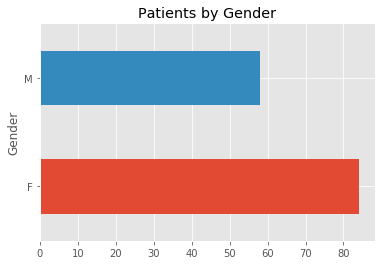

In [12]:
# generate bar graph for visualizing patient by gender
gender_count = df.drop_duplicates(['Subject ID']).groupby('Gender').count()['Subject ID']
gender_bar = gender_count.plot(kind='barh',grid=True,title='Patients by Gender')
print(gender_count)

EDU_ceil
1.0     1
2.0     4
3.0    64
4.0    67
5.0     6
Name: Subject ID, dtype: int64


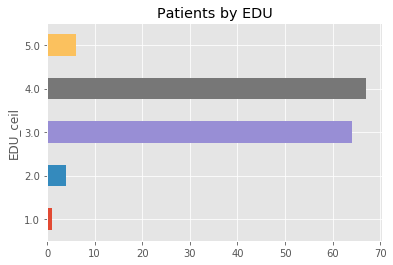

In [13]:
# generate bar graph for visualizing patient by EDU
edu_count = df.drop_duplicates(['Subject ID']).groupby('EDU_ceil').count()['Subject ID']

edu_bar = edu_count.plot(kind='barh',grid=True,title='Patients by EDU')
print(edu_count)

SES
1.0    33
2.0    42
3.0    34
4.0    30
5.0     3
Name: Subject ID, dtype: int64


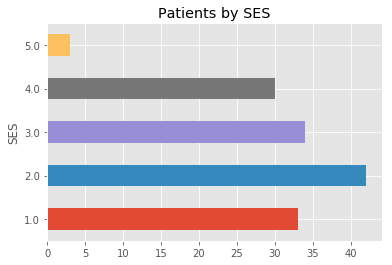

In [14]:
# generate bar graph for visualizing patient by SES
ses_count = df.drop_duplicates(['Subject ID']).groupby('SES').count()['Subject ID']
ses_bar = ses_count.plot(kind='barh',grid=True,title='Patients by SES')
print(ses_count)

Group
Converted      14
Demented       56
Nondemented    72
Name: Subject ID, dtype: int64


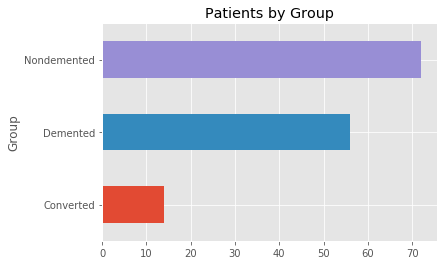

In [15]:
# generate bar graph for visualizing patients across groups
group_count = df.drop_duplicates(['Subject ID'],keep='last').groupby('Group').count()['Subject ID']
group_bar = group_count.plot(kind='barh',grid=True,title='Patients by Group',y='Patients')
print(group_count)

In [16]:
# create new dataframe, where converted group is demented
df2 = df.copy()
df2.loc[df2['Group'] == 'Converted','Group'] = 'Demented'

# check to make sure df2 has no converted instances
df2.loc[df2['Group'] == 'Converted'].head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDU,EDU_scaled,EDU_ceil,SES,MMSE,CDR,eTIV,nWBV,ASF


In [17]:
# check to make sure original df not affected
df.loc[df['Group'] == 'Converted'].head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDU,EDU_scaled,EDU_ceil,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,2.882,3.0,1.0,30.0,0.0,1406,0.715,1.248
1,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,2.882,3.0,1.0,29.0,0.0,1398,0.713,1.255
2,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,4.294,5.0,1.0,29.0,0.0,1587,0.693,1.106
3,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,2.412,3.0,3.0,30.0,0.0,1430,0.718,1.227
4,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,2.412,3.0,3.0,30.0,0.0,1445,0.719,1.215


Group
Demented       70
Nondemented    72
Name: Subject ID, dtype: int64


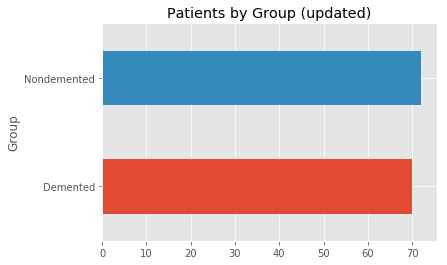

In [18]:
# another bar graph for patients across groups, using these changes
group_count = df2.drop_duplicates(['Subject ID'],keep='last').groupby('Group').count()['Subject ID']
group_bar = group_count.plot(kind='barh',grid=True,title='Patients by Group (updated)')
print(group_count)

Group
Converted      14.0
Demented       56.0
Nondemented    72.0
dtype: float64

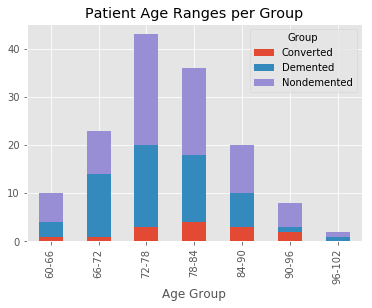

In [19]:
# cut patients into groups based on age bins
bins = np.arange(60,103,6) # or (60,100,3)
groups = [f'{holder}-{bins[i+1]}' for i, holder in enumerate(bins[:-1])]
df['Age Group'] = pd.cut(df['Age'],bins,labels=groups,include_lowest=True)

# display in stacked bar graph
group_by_age = df.drop_duplicates(['Subject ID'],keep='last').groupby(['Age Group','Group']).count()['Subject ID'].unstack()
group_stacked = group_by_age.plot(kind='bar',stacked=True,grid=True,title='Patient Age Ranges per Group')
group_by_age.sum() # must equal 142 patients

Group
Demented       70
Nondemented    72
dtype: int64

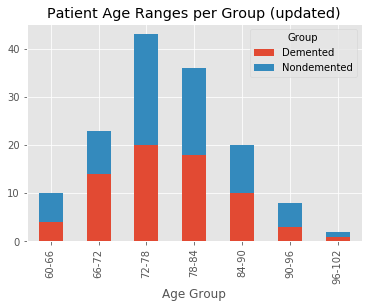

In [36]:
# cut patients into groups based on age bins
bins = np.arange(60,103,6) # or (60,100,3)
groups = [f'{holder}-{bins[i+1]}' for i, holder in enumerate(bins[:-1])]
df2['Age Group'] = pd.cut(df2['Age'],bins,labels=groups,include_lowest=True)

# display in stacked bar graph
group_by_age = df2.drop_duplicates(['Subject ID'],keep='last').groupby(['Age Group','Group']).count()['Subject ID'].unstack()
group_stacked = group_by_age.plot(kind='bar',stacked=True,grid=True,title='Patient Age Ranges per Group (updated)')
group_by_age.sum() # must equal 142 patients

,Age
Gender,
F,77.5
M,78.0


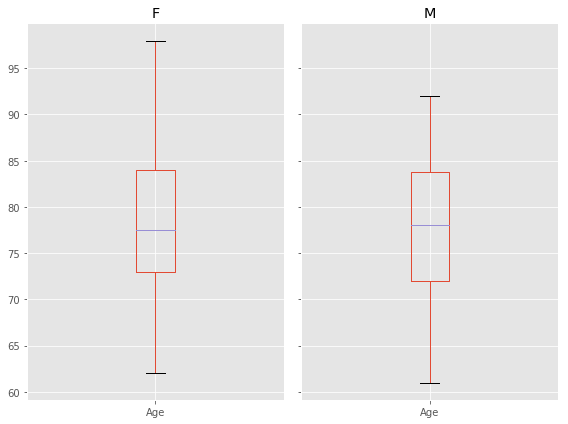

In [20]:
# generate box plot for age by gender
age_by_gender = df[['Subject ID','Gender','Age']].drop_duplicates(['Subject ID'],keep='last').groupby('Gender')
age_by_gender.head()

gender_box = age_by_gender.boxplot(figsize=(8,6))
plt.tight_layout()
age_by_gender.median()

,Age
Group,
Demented,78
Nondemented,78


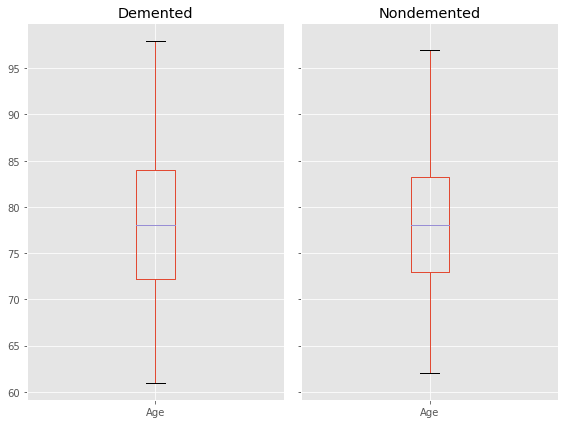

In [21]:
# generate box plot for age by group
age_by_group = df2[['Subject ID','Group','Age']].drop_duplicates(['Subject ID'],keep='last').groupby('Group')
age_by_group.head()

group_box = age_by_group.boxplot(figsize=(8,6))
plt.tight_layout()
age_by_group.median()

,EDU
Group,
Demented,14
Nondemented,16


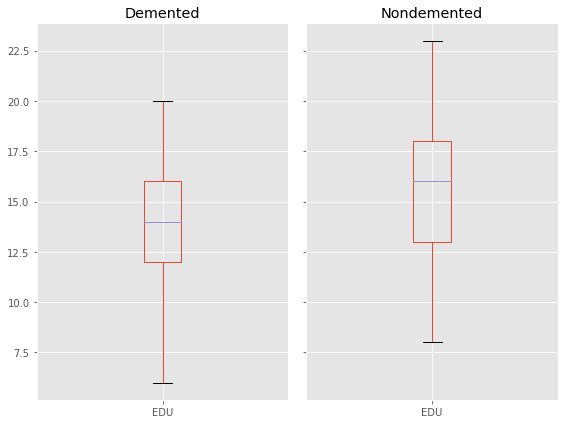

In [22]:
# generate box plot for edu score by group
age_by_edu = df2[['Subject ID','Group','EDU']].drop_duplicates(['Subject ID'],keep='last').groupby('Group')
age_by_edu.head()

edu_box = age_by_edu.boxplot(figsize=(8,6))
plt.tight_layout()
age_by_edu.median()

,SES
Group,
Demented,3.0
Nondemented,2.0


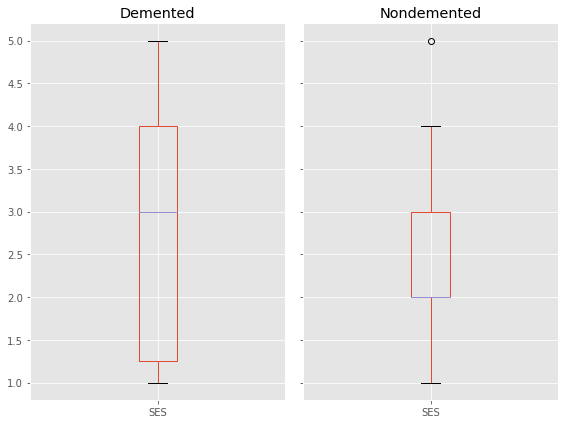

In [41]:
# generate box plot for ses score by group
age_by_ses = df2[['Subject ID','Group','SES']].drop_duplicates(['Subject ID'],keep='last').groupby('Group')
age_by_ses.head()

ses_box = age_by_ses.boxplot(figsize=(8,6))
plt.tight_layout()
age_by_ses.median()

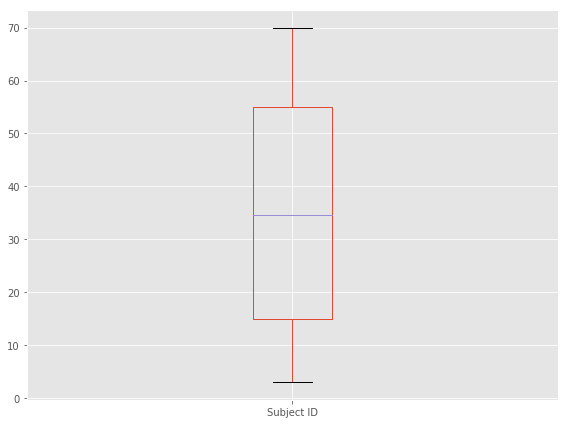

In [48]:
# generate box plot for edu score by group
age_by_edu = df2.drop_duplicates(['Subject ID'],keep='last')[['Subject ID','CDR']].groupby('CDR').count()
age_by_edu.head()

edu_box = age_by_edu.boxplot(figsize=(8,6))
plt.tight_layout()


Group
Demented        4.0
Nondemented    16.0
dtype: float64

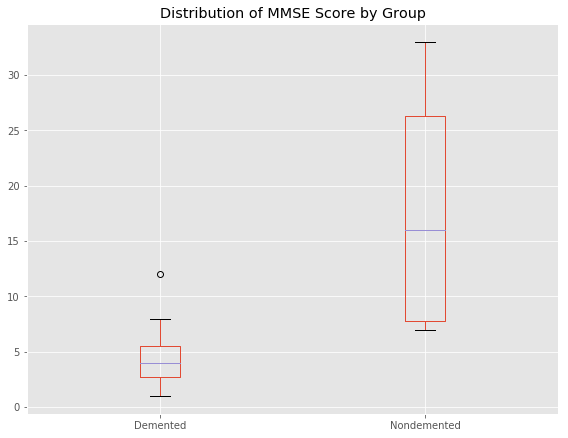

In [52]:
# generate box plot for edu score by group
age_by_edu = df2.drop_duplicates(['Subject ID'],keep='last').groupby(['MMSE','Group']).count()['Subject ID'].unstack()
age_by_edu.head()

edu_box = age_by_edu.boxplot(figsize=(8,6))
plt.tight_layout()
plt.title('Distribution of MMSE Score by Group')
age_by_edu.median()

,eTIV
Group,
Demented,1479
Nondemented,1473


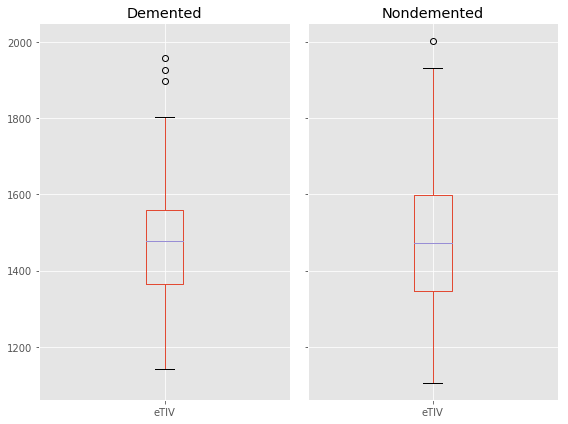

In [24]:
# generate box plot for tiv by group
age_by_tiv = df2[['Subject ID','Group','eTIV']].drop_duplicates(['Subject ID'],keep='last').groupby('Group')
age_by_tiv.head()

tiv_box = age_by_tiv.boxplot(figsize=(8,6))
plt.tight_layout()
age_by_tiv.median()

,nWBV
Group,
Demented,0.6995
Nondemented,0.7345


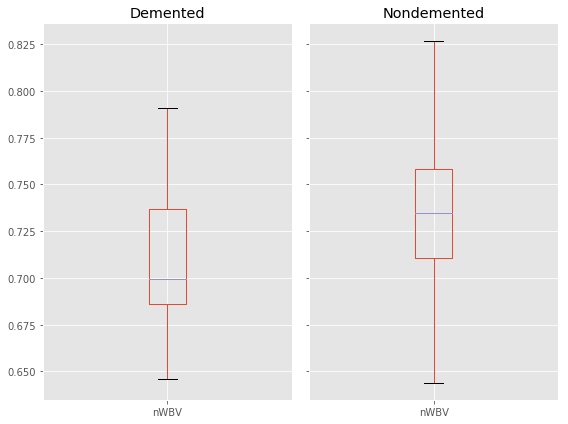

In [25]:
# generate box plot for wbv by group
age_by_wbv = df2[['Subject ID','Group','nWBV']].drop_duplicates(['Subject ID'],keep='last').groupby('Group')
age_by_wbv.head()

wbv_box = age_by_wbv.boxplot(figsize=(8,6))
plt.tight_layout()
age_by_wbv.median()

26-29    70
30       41
21-25    19
11-20    11
1-10      1
Name: MMSE group, dtype: int64

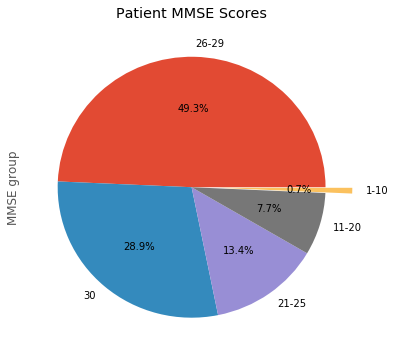

In [26]:
# pie chart for mmse ranges, 30 negative for dementia
# 26-29 questionable, 21-25 mild, 11-20 moderate, 1-10 severe
bins = [0,10,20,25,29,30]
groups = [f'{holder+1}-{bins[i+1]}' for i, holder in enumerate(bins[:-1])]
groups[4] = '30' # rename single group error

df['MMSE group'] = pd.cut(df['MMSE'],bins,labels=groups)
mmse_group = df.drop_duplicates(['Subject ID'],keep='last')['MMSE group'].value_counts()

mmse_group.plot.pie(y='MMSE group',figsize=(6,6),autopct='%1.1f%%',explode=[0,0,0,0,.2])
plt.title('Patient MMSE Scores')
mmse_group.head()

[70, 50, 19, 3]

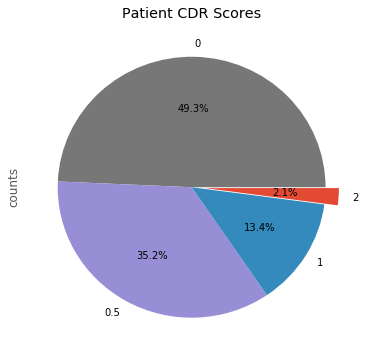

In [27]:
# pie chart for mmse ranges, 0 negative for dementia
# 3 severe, 2 moderate, 1 mild, 0.5 very mild
arr = [0,0.5,1,2]
dropped = df.drop_duplicates(['Subject ID'],keep='last')
cdr_counts = [dropped.loc[df['CDR'] == i,'Subject ID'].count() for i in arr]

cdr_counts_df = pd.DataFrame({'score':arr,'counts':cdr_counts})
cdr_counts_df.plot(kind='pie',y='counts',labels=arr,figsize=(6,6),autopct='%1.1f%%',explode=[0,0,0,.1],colors=['#777777','#988ED5','#348ABD','#E24A33'],legend=False)
plt.title('Patient CDR Scores')

cdr_counts

Group
Demented       0.5
Nondemented    0.0
Name: CDR, dtype: float64

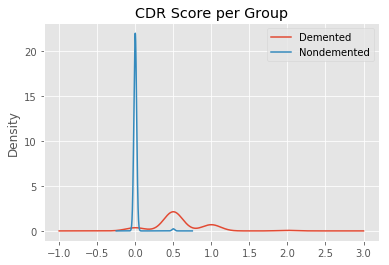

In [28]:
# density plot for cdr per group
df2.groupby('Group')['CDR'].plot.kde()
plt.legend()
plt.title('CDR Score per Group')
df2.groupby('Group')['CDR'].median()

Group
Demented       26.5
Nondemented    29.0
Name: MMSE, dtype: float64

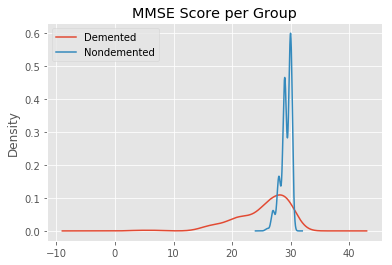

In [29]:
# density plot for mmse per group
df2.groupby('Group')['MMSE'].plot.kde()
plt.legend()
plt.title('MMSE Score per Group')
df2.groupby('Group')['MMSE'].median()

Group
Demented       1463.5
Nondemented    1474.5
Name: eTIV, dtype: float64

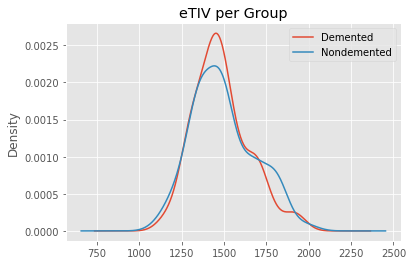

In [30]:
# density plot for tiv per group
df2.groupby('Group')['eTIV'].plot.kde()
plt.legend()
plt.title('eTIV per Group')
df2.groupby('Group')['eTIV'].median()

Group
Demented       14
Nondemented    16
Name: EDU, dtype: int64

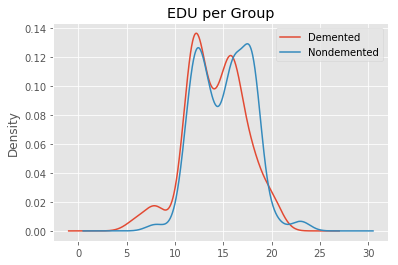

In [53]:
# density plot for wbv per group
df2.groupby('Group')['EDU'].plot.kde()
plt.legend()
plt.title('EDU per Group')
df2.groupby('Group')['EDU'].median()

Group
Demented       0.713
Nondemented    0.739
Name: nWBV, dtype: float64

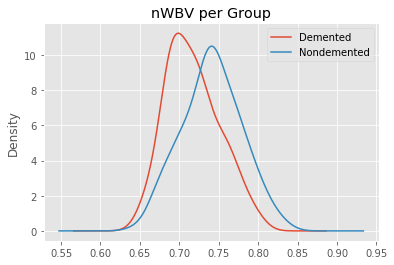

In [31]:
# density plot for wbv per group
df2.groupby('Group')['nWBV'].plot.kde()
plt.legend()
plt.title('nWBV per Group')
df2.groupby('Group')['nWBV'].median()

Gender
F    0.0
M    0.5
Name: CDR, dtype: float64

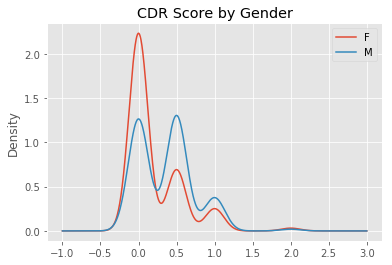

In [32]:
# density plot for cdr by gender
df2.groupby('Gender')['CDR'].plot.kde()
plt.legend()
plt.title('CDR Score by Gender')
df2.groupby('Gender')['CDR'].median()

Gender
F    29.0
M    28.0
Name: MMSE, dtype: float64

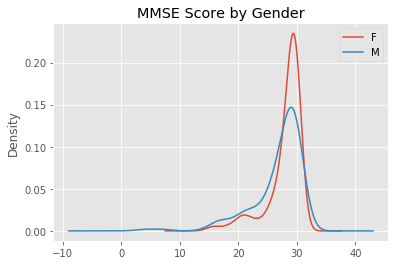

In [33]:
# density plot for mmse by gender
df2.groupby('Gender')['MMSE'].plot.kde()
plt.legend()
plt.title('MMSE Score by Gender')
df2.groupby('Gender')['MMSE'].median()

Gender
F    1402
M    1605
Name: eTIV, dtype: int64

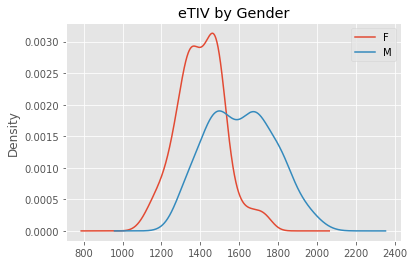

In [34]:
# density plot for tiv by gender
df2.groupby('Gender')['eTIV'].plot.kde()
plt.legend()
plt.title('eTIV by Gender')
df2.groupby('Gender')['eTIV'].median()

Gender
F    0.7395
M    0.7155
Name: nWBV, dtype: float64

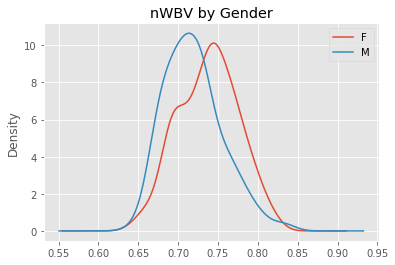

In [35]:
# density plot for wbv by gender
df2.groupby('Gender')['nWBV'].plot.kde()
plt.legend()
plt.title('nWBV by Gender')
df2.groupby('Gender')['nWBV'].median()

In [36]:
# not significant: SES, eTIV
# significant: MMSE, CDR, nWBV

# interestingly, # of visits is significant with nondemented having more visits
# we want significant difference to prove this data was not randomly selected
# instead specifically selected from patient populations of demented and nondemented
# just proves this is non-random, not very relevant to our analysis

The difference in sample means for SES is not significant. (p-val = 0.10000255625169246)
The difference in sample means for eTIV is not significant. (p-val = 0.9009305296151617)


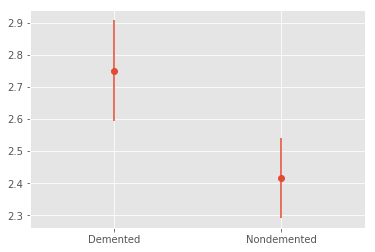

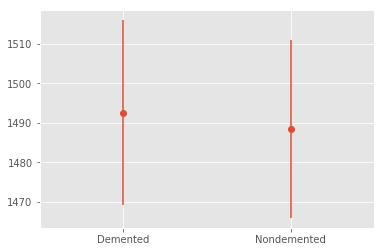

In [37]:
# non-significant groups: SES, eTIV
arr = ['SES','eTIV']
for i in arr:
    pop1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented'][i]
    pop2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented'][i]

    (t_stat, p) = stats.ttest_ind(pop1, pop2, equal_var=False)

    if p < 0.05:
        print(f'The difference in sample means for {i} is significant. (p-val = {p})')
    else:
        print(f'The difference in sample means for {i} is not significant. (p-val = {p})')
    
    m1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented'][i].mean()
    m2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented'][i].mean()

    s1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented'][i].sem()
    s2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented'][i].sem()

    means = [m1,m2]
    sems = [s1,s2]
    
    fig, ax = plt.subplots()
    x_axis = np.arange(0, len(means))
    ax.errorbar(x_axis, means, yerr=sems, fmt="o")
    
    ax.set_xticks([0, 1])
    ax.set_xlim(-0.5, 1.5)
    ax.set_xticklabels(['Demented','Nondemented'])

The difference in sample means for CDR is significant. (p-val = 1.1179431328730806e-20)
The difference in sample means for MMSE is significant. (p-val = 6.368662877427826e-11)
The difference in sample means for nWBV is significant. (p-val = 0.00035160472327363124)
The difference in sample means for EDU is significant. (p-val = 0.01296119942735333)
The difference in sample means for Visit is significant. (p-val = 0.0025699692177188265)


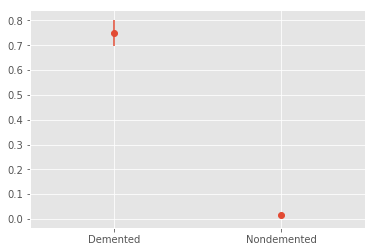

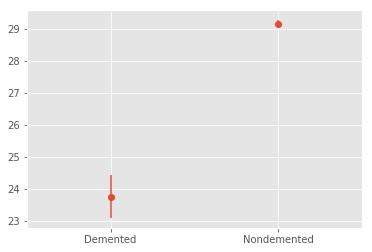

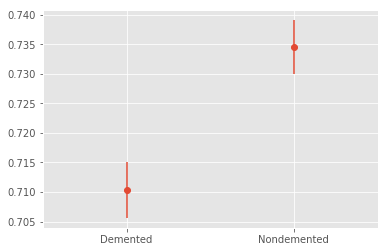

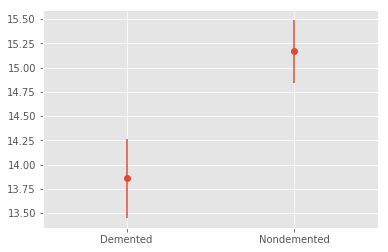

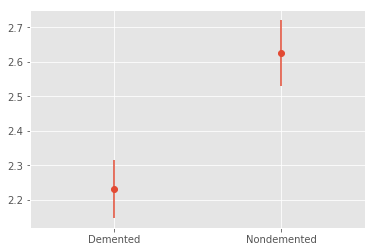

In [38]:
# significant groups: MMSE, CDR, nWBV
arr = ['CDR','MMSE','nWBV','EDU','Visit']
for i in arr:
    pop1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented'][i]
    pop2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented'][i]

    (t_stat, p) = stats.ttest_ind(pop1, pop2, equal_var=False)

    if p < 0.05:
        print(f'The difference in sample means for {i} is significant. (p-val = {p})')
    else:
        print(f'The difference in sample means for {i} is not significant. (p-val = {p})')
    
    m1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented'][i].mean()
    m2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented'][i].mean()

    s1 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Demented'][i].sem()
    s2 = df.drop_duplicates(['Subject ID'],keep='last').loc[df['Group'] == 'Nondemented'][i].sem()

    means = [m1,m2]
    sems = [s1,s2]
    
    fig, ax = plt.subplots()
    x_axis = np.arange(0, len(means))
    ax.errorbar(x_axis, means, yerr=sems, fmt="o")
    
    ax.set_xticks([0, 1])
    ax.set_xlim(-0.5, 1.5)
    ax.set_xticklabels(['Demented','Nondemented'])

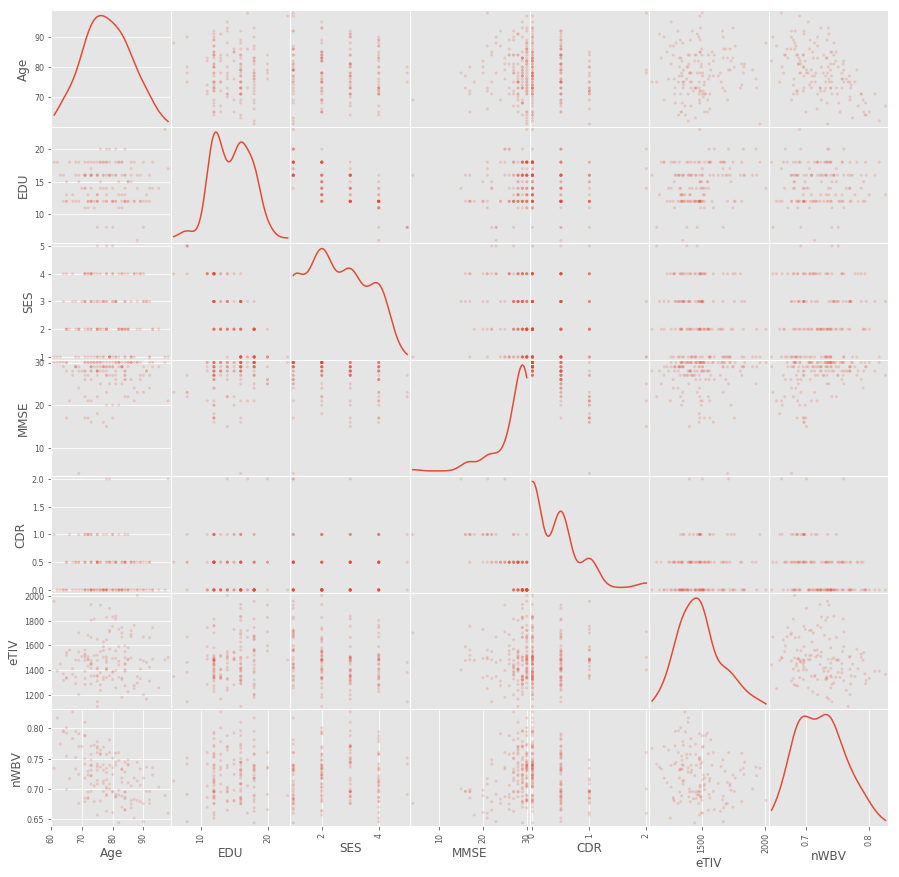

In [66]:
# pull necessary columns for scatter matrix and colorplot
matrix_data = df2.drop_duplicates(['Subject ID'],keep='last')[['Age','EDU','SES','MMSE','CDR','eTIV','nWBV']]
matrix_data2 = df2.drop_duplicates(['Subject ID'],keep='last')[['Group','Gender','Age','EDU','SES','MMSE','CDR','eTIV','nWBV']]

# matrix plot with density plots instead of histograms
scatter_matrix = pd.plotting.scatter_matrix(matrix_data, alpha=0.2,diagonal='kde',figsize=(15,15),grid=True)

plt.savefig('matrix.png')

In [67]:
# replace categorical variables with quantitative data
matrix_data2['Gender'] = matrix_data2['Gender'].replace(['M','F'], [0,1])
matrix_data2['Group'] = matrix_data2['Group'].replace(['Demented','Nondemented'], [0,1])

# calculate correlation coefficients
cr = matrix_data2.corr()
# cr_abs = cr.abs()
cr

,Group,Gender,Age,EDU,SES,MMSE,CDR,eTIV,nWBV
Group,1.000000,0.212298,0.041740,0.182332,-0.068819,0.549070,-0.803273,0.011109,0.297470
Gender,0.212298,1.000000,0.046784,-0.071606,0.033024,0.145950,-0.170347,-0.571010,0.215464
Age,0.041740,0.046784,1.000000,-0.023026,-0.041765,0.063703,-0.028736,0.018729,-0.520966
EDU,0.182332,-0.071606,-0.023026,1.000000,-0.725770,0.196523,-0.113696,0.232042,0.029553
SES,-0.068819,0.033024,-0.041765,-0.725770,1.000000,-0.165343,0.034501,-0.247271,0.061297
MMSE,0.549070,0.145950,0.063703,0.196523,-0.165343,1.000000,-0.683496,-0.013221,0.355528
CDR,-0.803273,-0.170347,-0.028736,-0.113696,0.034501,-0.683496,1.000000,0.078973,-0.311423
eTIV,0.011109,-0.571010,0.018729,0.232042,-0.247271,-0.013221,0.078973,1.000000,-0.213791
nWBV,0.297470,0.215464,-0.520966,0.029553,0.061297,0.355528,-0.311423,-0.213791,1.000000


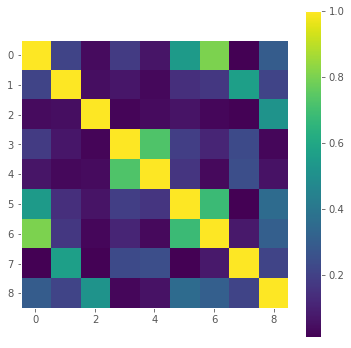

In [41]:
# visualize highest correlation coefficients
# use absolute value for clarity
fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(cr_abs)
plt.colorbar()
plt.grid(b=False)
plt.savefig('colormap.png')

## some nonsense graphs:

Text(0.5,1,'Visit by Subject ID')

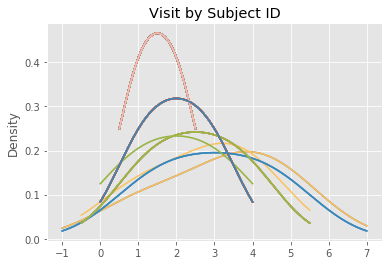

In [53]:
df2.groupby('Subject ID')['Visit'].plot.kde()
plt.title('Visit by Subject ID')

Text(0.5,1,'MR Delay by Subject ID')

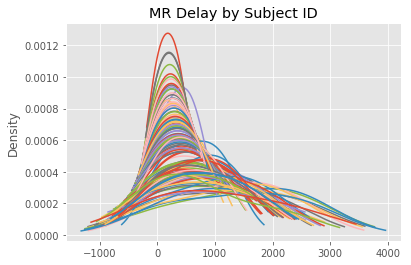

In [72]:
df2.groupby('Subject ID')['MR Delay'].plot.kde()
plt.title('MR Delay by Subject ID')